<a href="https://colab.research.google.com/github/priyanka0178885547/ML-LAB/blob/main/Week6_2_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/heart.csv")
df.shape

(1025, 14)

In [3]:
df=df.drop_duplicates()
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X=df.drop(labels='target',axis=1)
y=df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7362637362637363


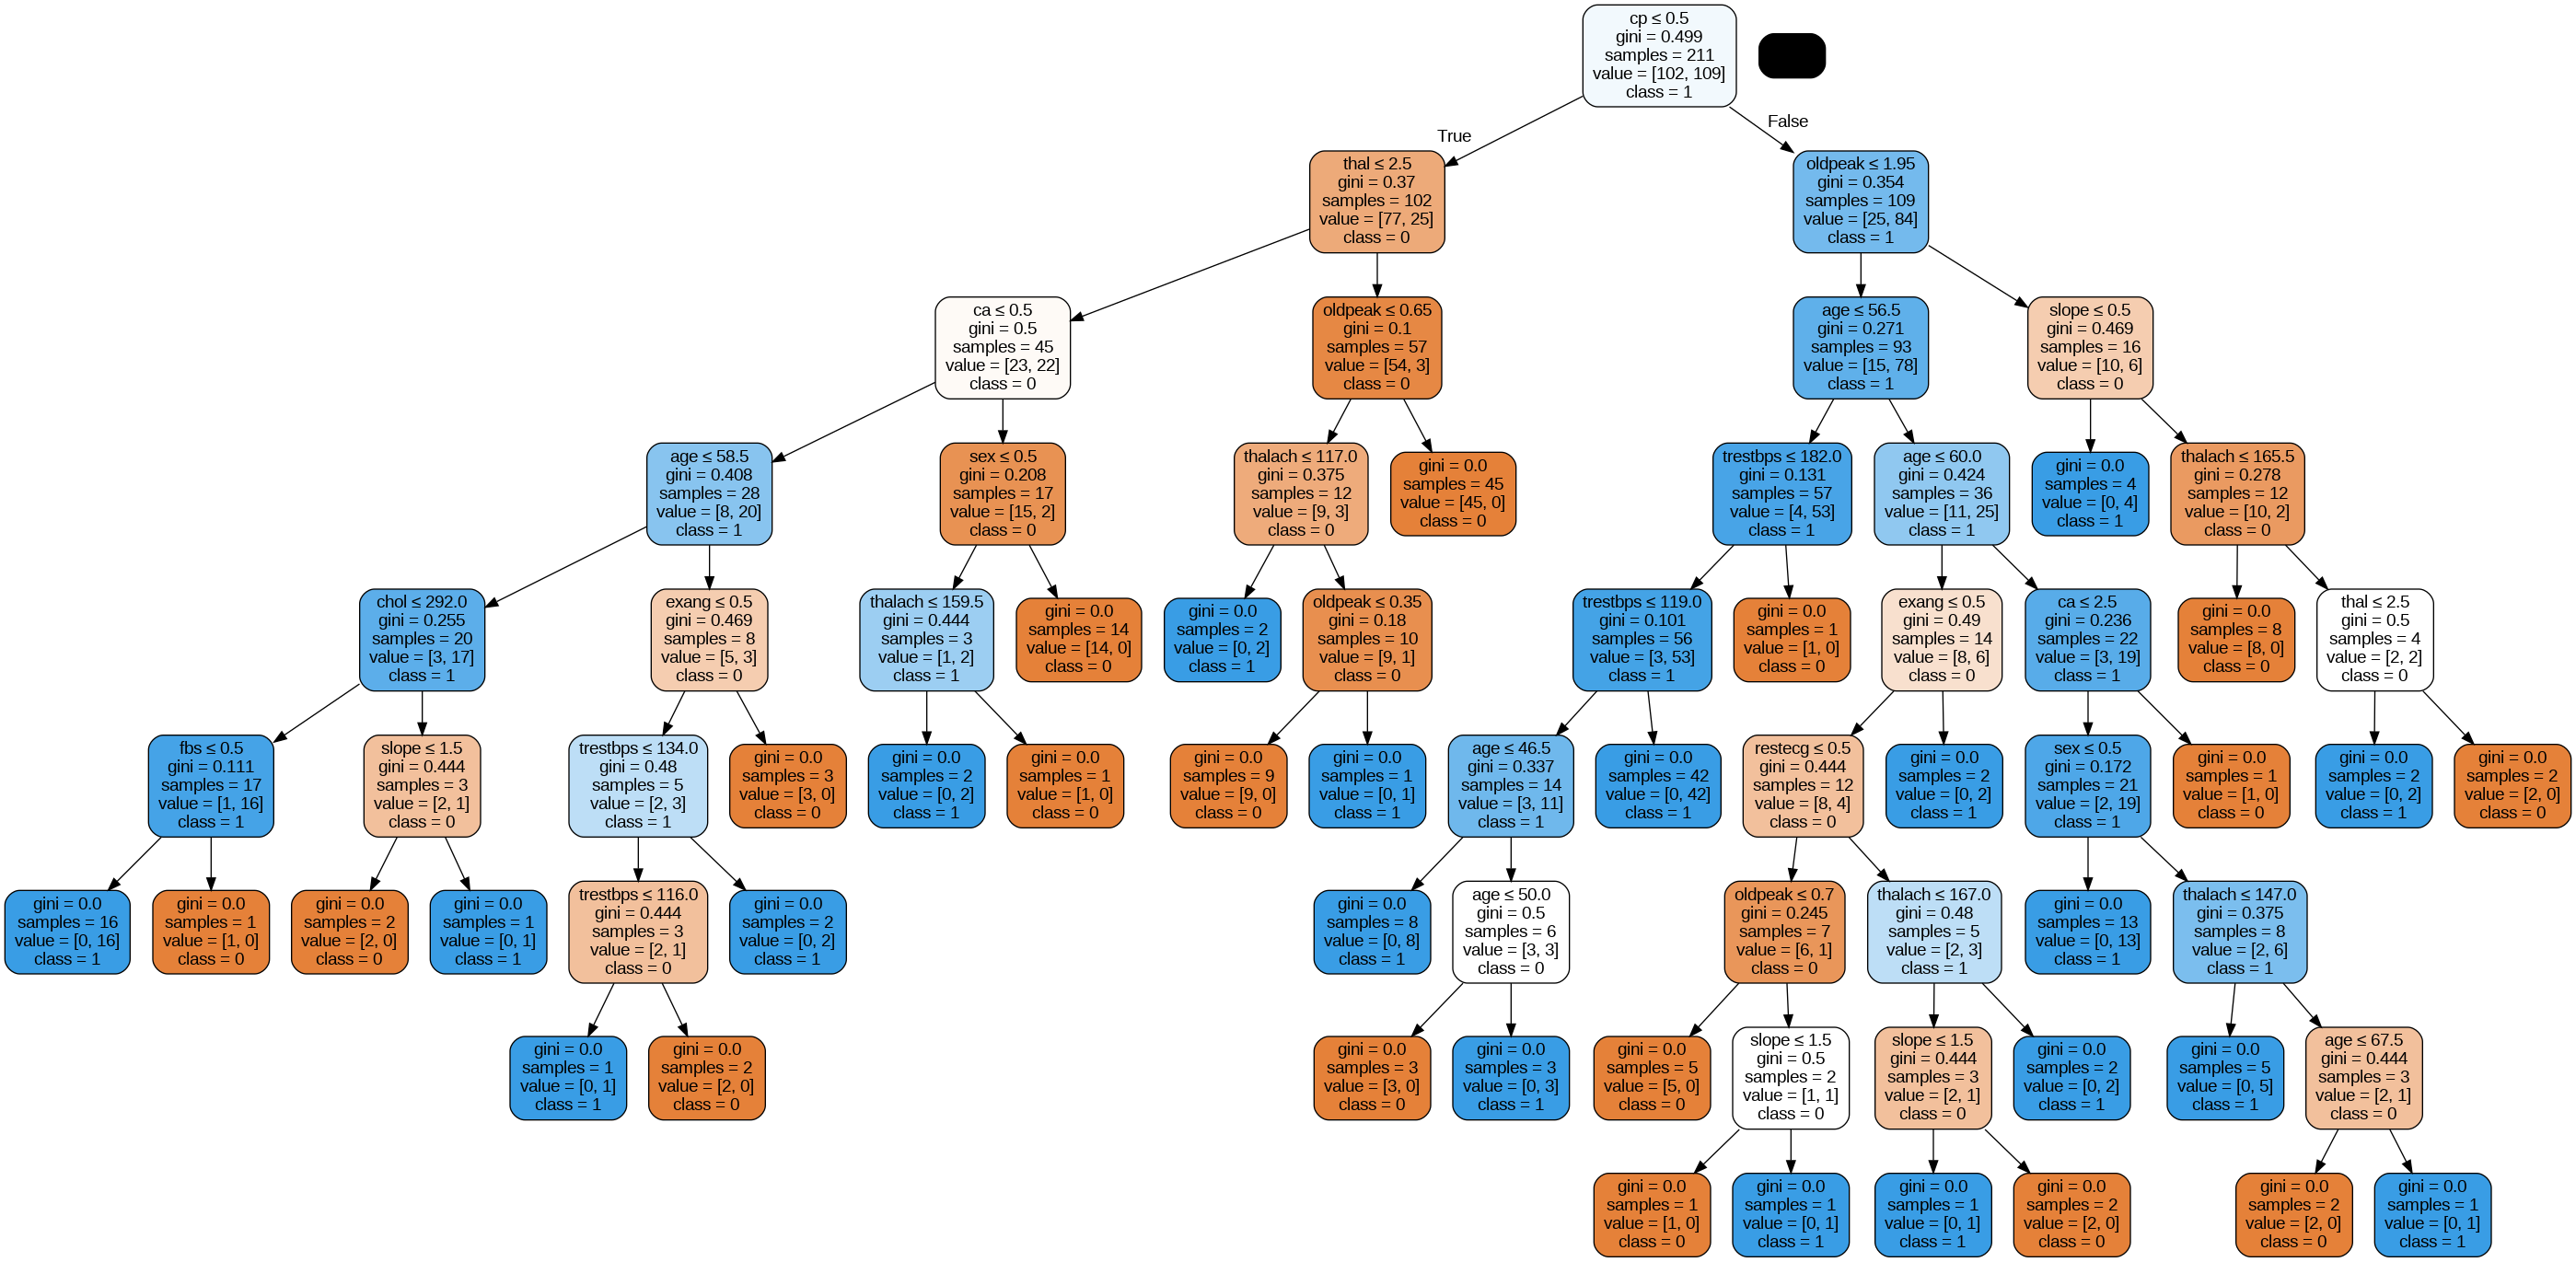

In [10]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data= StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart.png')
Image(graph.create_png())

Accuracy: 0.7472527472527473


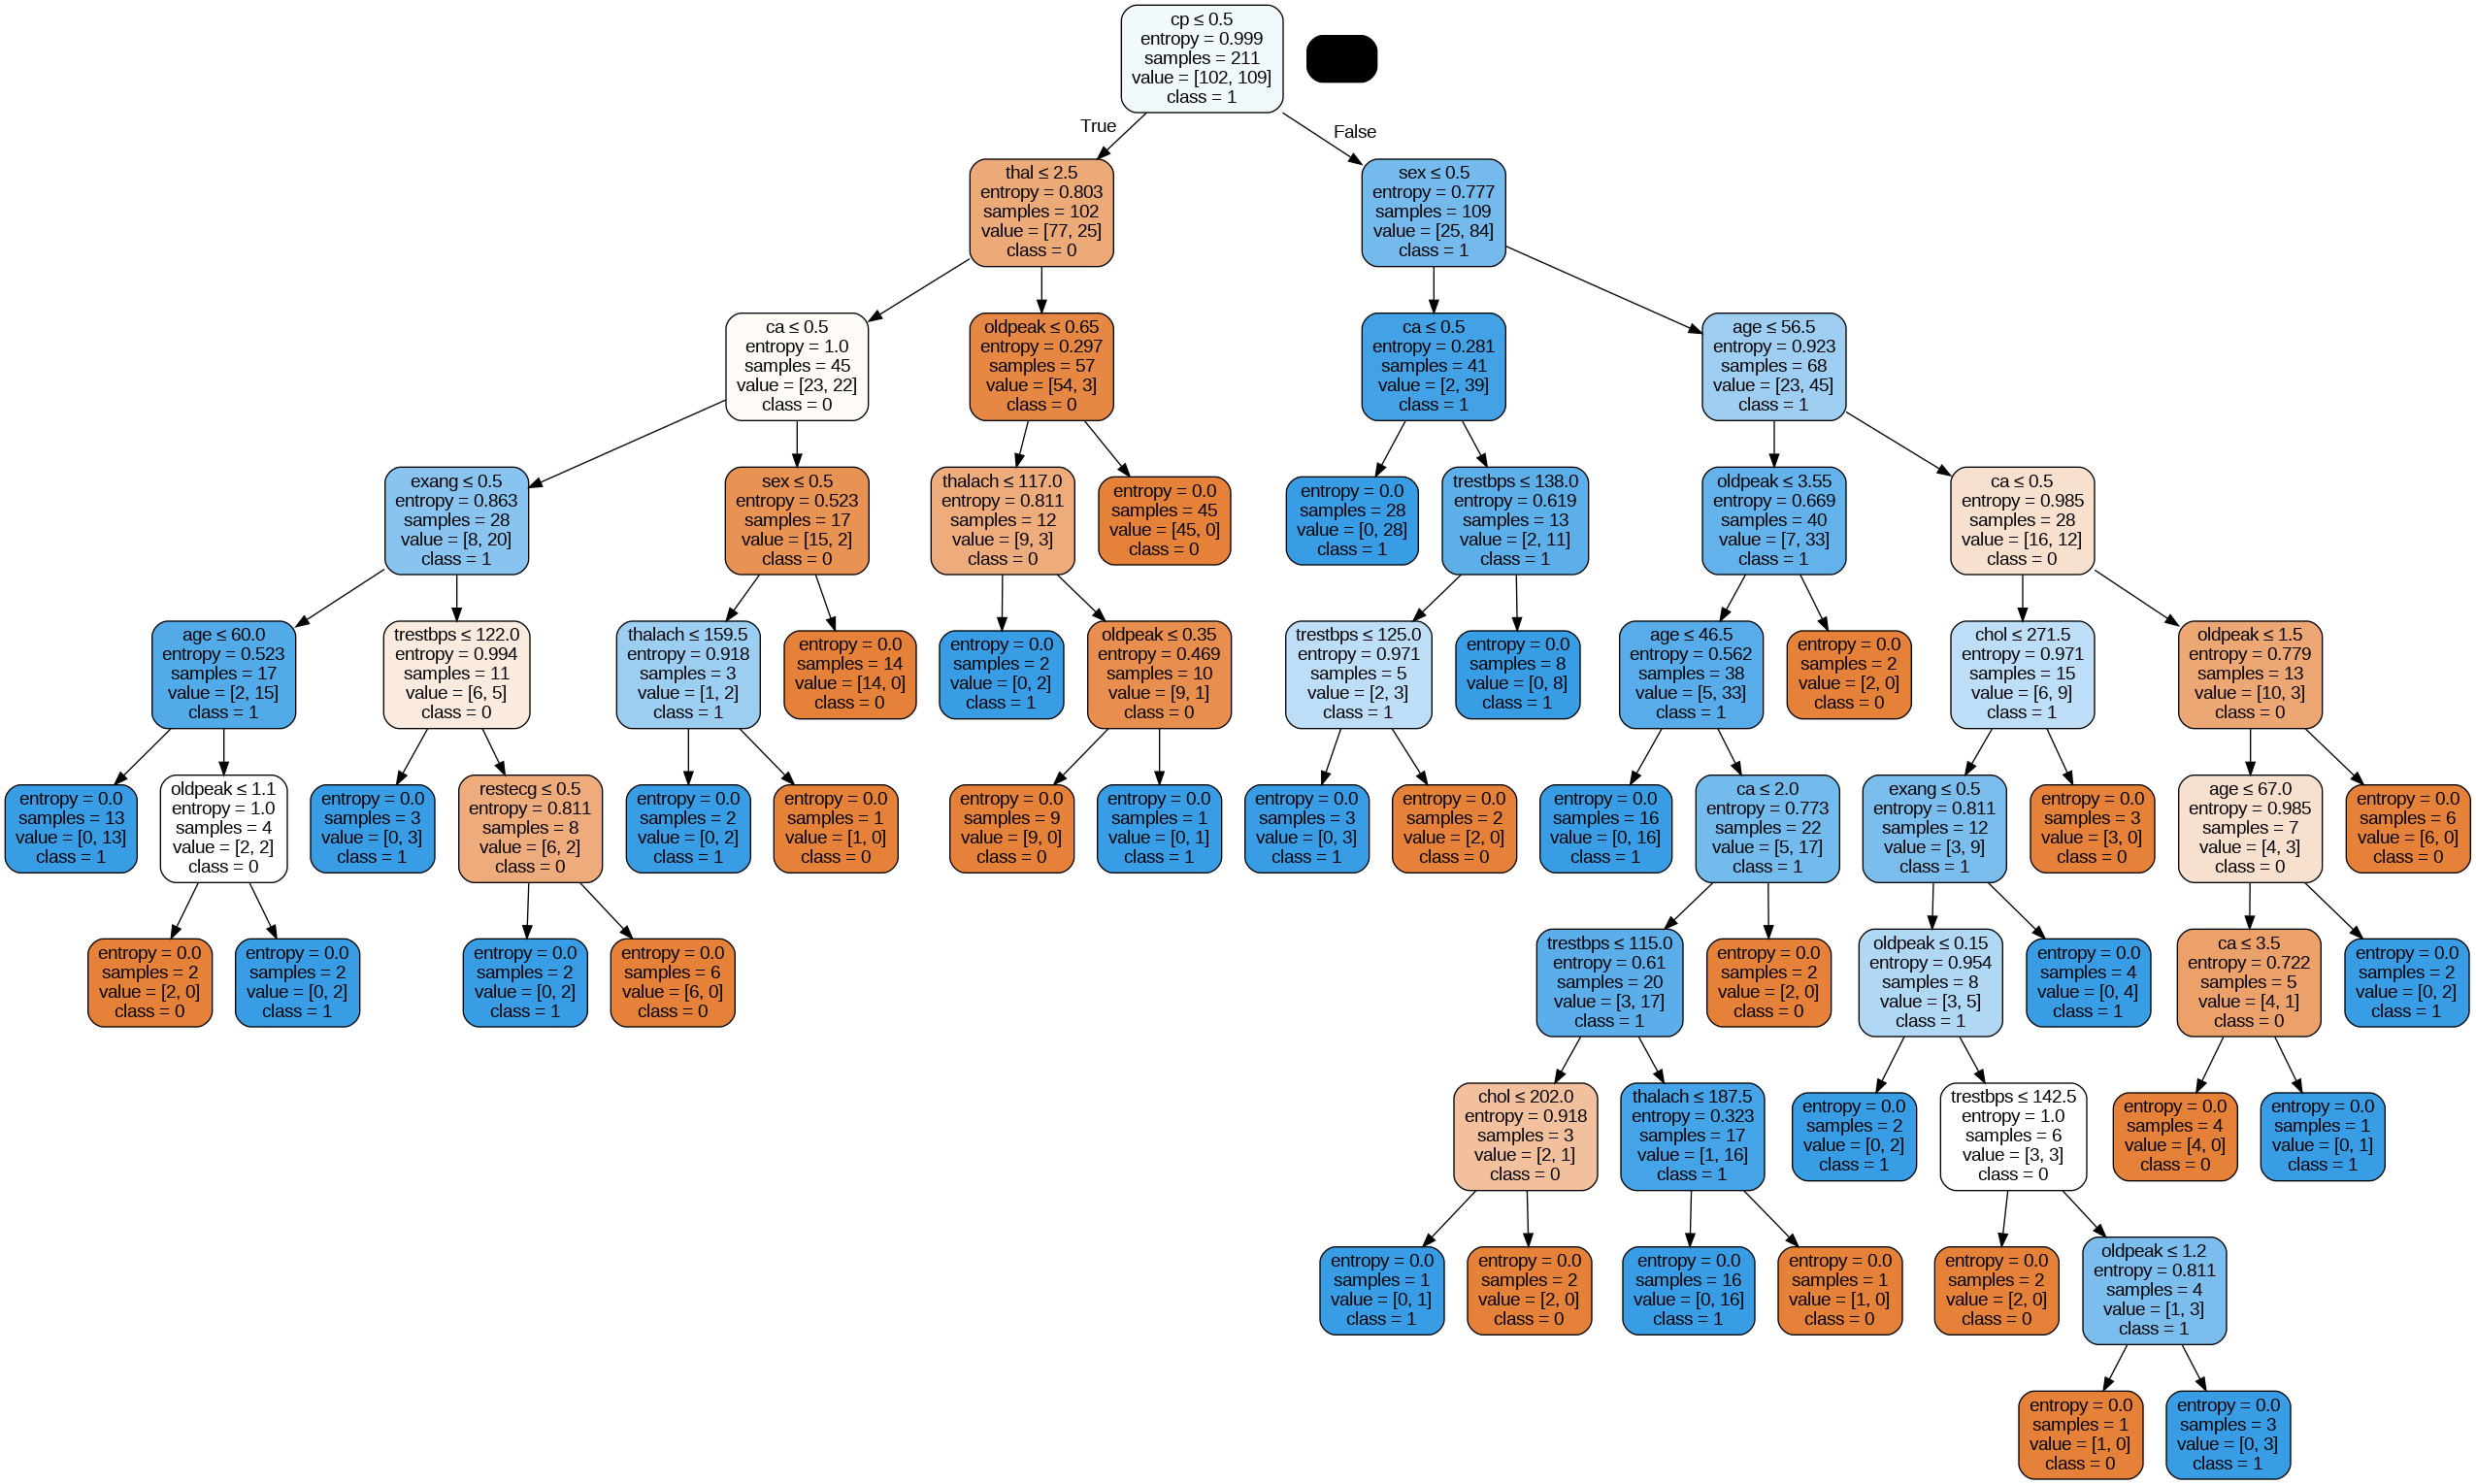

In [11]:
clf=DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

dot_data= StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart.png')
Image(graph.create_png())

Accuracy: 0.7472527472527473


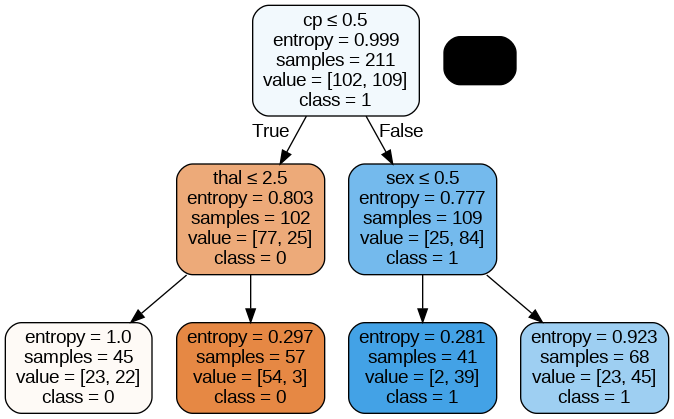

In [12]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=100)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

dot_data= StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart.png')
Image(graph.create_png())

In [13]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Confusion matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.8241758241758241
Confusion matrix:
 [[31  5]
 [11 44]]


In [14]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8461538461538461
Precision: 0.8727272727272727
Recall: 0.8727272727272727


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 58.24%
